# Mission 

premise 문장을 참고해 hypothesis 문장이 참인지(Entailment), 거짓인지(Contradiction), 혹은 참/거짓 여부를 알 수 없는 문장인지(Neutral)를 판별해야 합니다. 

대회 : [URL](https://dacon.io/competitions/official/235875/overview/description)

In [ ]:
!unzip open.zip

Archive:  open.zip
  inflating: open/sample_submission.csv  
  inflating: open/test_data.csv      
  inflating: open/train_data.csv     


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = "/content/drive/MyDrive/10_개인/DACON/KOREAN_SENTENCE_CLASSIFY"

In [3]:
import pandas as pd 

In [4]:
train = pd.read_csv(f"{path}/open/train_data.csv") # (24998, 4)
test = pd.read_csv(f"{path}/open/test_data.csv") # (1666, 4)

In [5]:
## 정답지의 분포를 보기 

from collections import Counter

[print(f"{x:>15} : {y:,} & {y/train.shape[0]:.2f}") for x, y in Counter(train.label).items()]


#   contradiction : 8,489 & 0.34 ==> 거짓 
#      entailment : 8,561 & 0.34 ==> 참 
#         neutral : 7,948 & 0.32 ==> 모름 

  contradiction : 8,489 & 0.34
     entailment : 8,561 & 0.34
        neutral : 7,948 & 0.32


[None, None, None]

In [15]:
## 데이터 예시 보기 
idx1 = train.label == 'contradiction'
train.loc[idx1, ['premise', 'hypothesis']].head(5)

,premise,hypothesis
0,"씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서, 소년이나 장정들이...",씨름의 여자들의 놀이이다.
1,"삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나,...",자작극을 벌인 이는 3명이다.
7,시대상황을 고려하는 현명한 시청태도가 요구되다.,시청태도에 특별한 주의점은 없다.
8,사진과 차이없는 아기자기한 실내소품들과 분위기가 멋졌습니다.,아기자기한 실내소품들은 사진에서 본 것과 차이가 있었습니다.
9,"빠른 답장과 간편한 체크인, 깨끗한 집 좋았어요",체크인이 복잡했어요.


In [16]:
## 데이터 예시 보기 

idx1 = train.label == 'entailment'
train.loc[idx1, ['premise', 'hypothesis']].head(5)

,premise,hypothesis
2,이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다.,예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다.
5,이번 증설로 코오롱인더스트리는 기존 생산량 7만7000톤에서 1만6800톤이 늘어나...,코오롱 인더스트리는 총 9만 3800톤의 생산 능력을 확보했다.
10,대부분 도보로 이동하기 충분하다는 점이 매력적이었어요.,대부분 걸어서 갈수 있어요.
12,영화 시작부터 끝까지 긴장감을 늦출 수가 없네요.,영화 시작부터 긴장감이 함께하네요.
16,국토교통부는 연료보조금 지급 근거를 마련하기 위해 올해 하반기에 여객자동차 및 화물...,여객자동차 및 화물자동차 운수사업법을 국토교통부가 개정할 계획이다.


In [17]:
## 데이터 예시 보기 

idx1 = train.label == 'neutral'
train.loc[idx1, ['premise', 'hypothesis']].head(5)

,premise,hypothesis
3,광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...,원주민들은 종합대책에 만족했다.
4,"진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면, 이런 상황에서는...",이런 상황에서 책임 있는 모습을 보여주는 기업은 아주 드물다.
6,자신뿐만 아니라 남을 돕고자 하는 청년의 꿈과 열정에 모두가 주목하고 있다.,모든 청년은 꿈과 열정을 가지고 있다.
11,오후에는 소흘읍민의 멋진 끼를 엿볼 수 있는 호수둘레길 버스킹 공연이 연이어 진행된다.,호수둘레길 버스킹 공연에 많은 군민들이 참석했다.
15,상당히 많은 것을 내포하고 있는 영화.,인간의 감정에 대한 내용을 내포하고 있는 영화.


In [31]:
import matplotlib.pyplot as plt

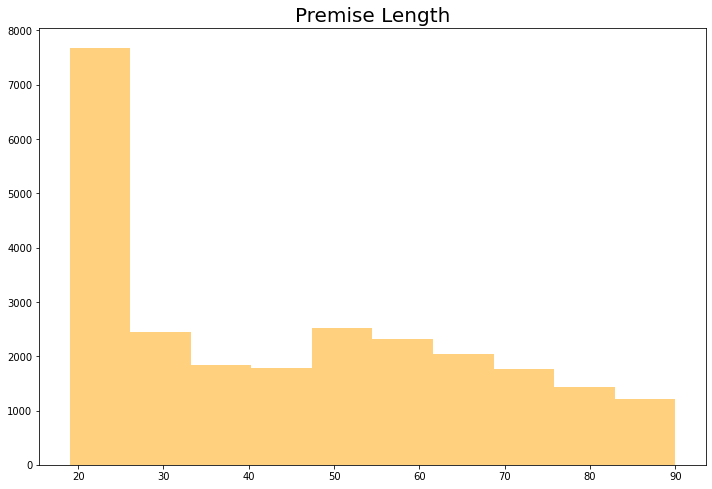

In [32]:

plt.figure(figsize=(10,7.5))
plt.title('Premise Length', fontsize=20)

plt.hist(train['premise'].str.len(), alpha=0.5, color='orange')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정

plt.show()

In [29]:
train.premise.str.len().describe()

# 평균 45 length
# 최대 90 
# 최소 19
# 75% 62

count    24998.000000
mean        45.406553
std         20.657961
min         19.000000
25%         25.000000
50%         43.000000
75%         62.000000
max         90.000000
Name: premise, dtype: float64

In [21]:
train.premise.apply(lambda x : len(x.split())).describe()

# 평균 10개의 단어로 만들어짐 
# 75% 15

count    24998.000000
mean        10.738299
std          4.989391
min          1.000000
25%          6.000000
50%         10.000000
75%         15.000000
max         27.000000
Name: premise, dtype: float64

In [30]:
train.hypothesis.str.len().describe()

# 평균 24 length
# 최대 103 
# 최소 5
# 75% 29

count    24998.000000
mean        24.924434
std          9.638541
min          5.000000
25%         18.000000
50%         23.000000
75%         29.000000
max        103.000000
Name: hypothesis, dtype: float64

In [22]:
train.hypothesis.apply(lambda x : len(x.split())).describe()

# 평균 6개의 단어 
# 75% 7

count    24998.000000
mean         5.839987
std          2.400993
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         25.000000
Name: hypothesis, dtype: float64

In [26]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24998 entries, 0 to 24997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       24998 non-null  int64 
 1   premise     24998 non-null  object
 2   hypothesis  24998 non-null  object
 3   label       24998 non-null  object
dtypes: int64(1), object(3)
memory usage: 781.3+ KB
None


In [27]:
print(train.info(), end = '\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24998 entries, 0 to 24997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       24998 non-null  int64 
 1   premise     24998 non-null  object
 2   hypothesis  24998 non-null  object
 3   label       24998 non-null  object
dtypes: int64(1), object(3)
memory usage: 781.3+ KB
None



In [ ]:
# # save file
# sample = pd.read_csv(f"{path}/open/sample_submission.csv")
# sample.label = 'contradiction'
# sample.to_csv(f"{path}/summit/220222_1.csv", index=0)